# Data Preprocessing — Missing Data, Encoding, and Feature Scaling

In [9]:
from IPython.display import Image
Image(url = "https://i0.wp.com/beforesandafters.com/wp-content/uploads/2022/12/Titanic2.jpg?fit=1200%2C679&ssl=1")

Importing Titanic Data **Set**

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np

path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Path to Data set  files : ",path)

print(os.listdir(path))
csv_file_path = os.path.join(path,'Titanic-Dataset.csv')

data = pd.read_csv(csv_file_path)

print(data.head())

Path to Data set  files :  /kaggle/input/titanic-dataset
['Titanic-Dataset.csv']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803 

In [ ]:
print(data.dtypes)
print(data.select_dtypes(include=['object']).head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

In [ ]:
data['Sex'] = data['Sex'].astype(str).str.strip().str.lower()
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
print(data['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [ ]:
print(data['Sex'].unique())


[0 1]


In [ ]:
print(data['Embarked'].unique())

['S' 'C' 'Q' nan]


In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
print(data['Embarked'].unique())

['S' 'C' 'Q']


# **ONE HOT ENCODING**

In [ ]:
data = pd.get_dummies(data, columns = ['Embarked'], prefix='Embarked')
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False       False        True  
1          PC 17599  71.2833   C85        True       False       False  
2  STON/O2. 3101282   7.9250   NaN       False       False        True  
3   

In [ ]:
data[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

print("Embarked_C:", data['Embarked_C'].unique())
print("Embarked_Q:", data['Embarked_Q'].unique())
print("Embarked_S:", data['Embarked_S'].unique())


Embarked_C: [0 1]
Embarked_Q: [0 1]
Embarked_S: [1 0]


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
data['Cabin'] = data['Cabin'].fillna('Unknown')
print(data['Cabin'].unique()[:5])

['Unknown' 'C85' 'C123' 'E46' 'G6']


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,0,1


In [ ]:
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if x != 'Uknown' else 'U')
print(data['Deck'].head())

0    U
1    C
2    U
3    C
4    U
Name: Deck, dtype: object


# **Group By Tickets**
counting how many passengers share each ticket

In [ ]:
ticket_count = data['Ticket'].value_counts()
print(ticket_count)

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


In [ ]:
data['TicketGroupSize'] = data['Ticket'].map(ticket_count)
print(data[['Ticket', 'TicketGroupSize']].head(10))

             Ticket  TicketGroupSize
0         A/5 21171                1
1          PC 17599                1
2  STON/O2. 3101282                1
3            113803                2
4            373450                1
5            330877                1
6             17463                1
7            349909                4
8            347742                3
9            237736                2


In [ ]:
print(data['TicketGroupSize'].unique())

[1 2 4 3 7 5 6]


In [ ]:
def group_type(size):
  if size == 1:
    return 'solo'
  elif size == 2:
    return 'couple'
  else:
    return 'family'

data['GroupType'] = data['TicketGroupSize'].apply(group_type)
print(data[['Ticket', 'TicketGroupSize', 'GroupType']].head())

             Ticket  TicketGroupSize GroupType
0         A/5 21171                1      solo
1          PC 17599                1      solo
2  STON/O2. 3101282                1      solo
3            113803                2    couple
4            373450                1      solo


# **Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_col = ['Age', 'Fare', 'TicketGroupSize']

scaler = StandardScaler()

data[scale_col] = scaler.fit_transform(data[scale_col])

print("Scaler Features")

print(data[scale_col])

Scaler Features
          Age      Fare  TicketGroupSize
0   -0.530377 -0.502445        -0.579162
1    0.571831  0.786845        -0.579162
2   -0.254825 -0.488854        -0.579162
3    0.365167  0.420730         0.155928
4    0.365167 -0.486337        -0.579162
..        ...       ...              ...
886 -0.185937 -0.386671        -0.579162
887 -0.737041 -0.044381        -0.579162
888       NaN -0.176263         0.155928
889 -0.254825 -0.044381        -0.579162
890  0.158503 -0.492378        -0.579162

[891 rows x 3 columns]


# **MEAN AND STANDARD DEVIATION AFTER SCALING**

In [ ]:
print('Mean:',data[scale_col].mean())

print('Standard deviation:', data[scale_col].std())

Mean: Age                2.388379e-16
Fare               3.987333e-18
TicketGroupSize    6.180366e-17
dtype: float64
Standard deviation: Age                1.000701
Fare               1.000562
TicketGroupSize    1.000562
dtype: float64


In [ ]:
print(data.isnull().sum())

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
Deck                 0
TicketGroupSize      0
GroupType            0
dtype: int64


In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
print(data['Age'].head())

0   -0.530377
1    0.571831
2   -0.254825
3    0.365167
4    0.365167
Name: Age, dtype: float64


/tmp/ipython-input-23-3588383093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace = True)


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Visual Charts**

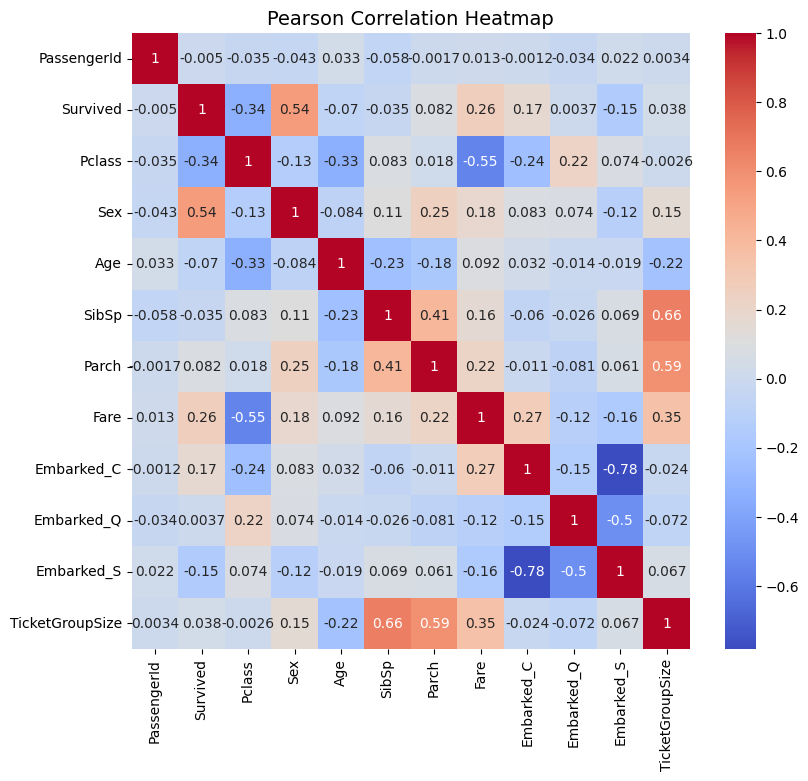

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numeric_df = data.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr(method = 'pearson')

plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Pearson Correlation Heatmap', fontsize=14)
plt.show()

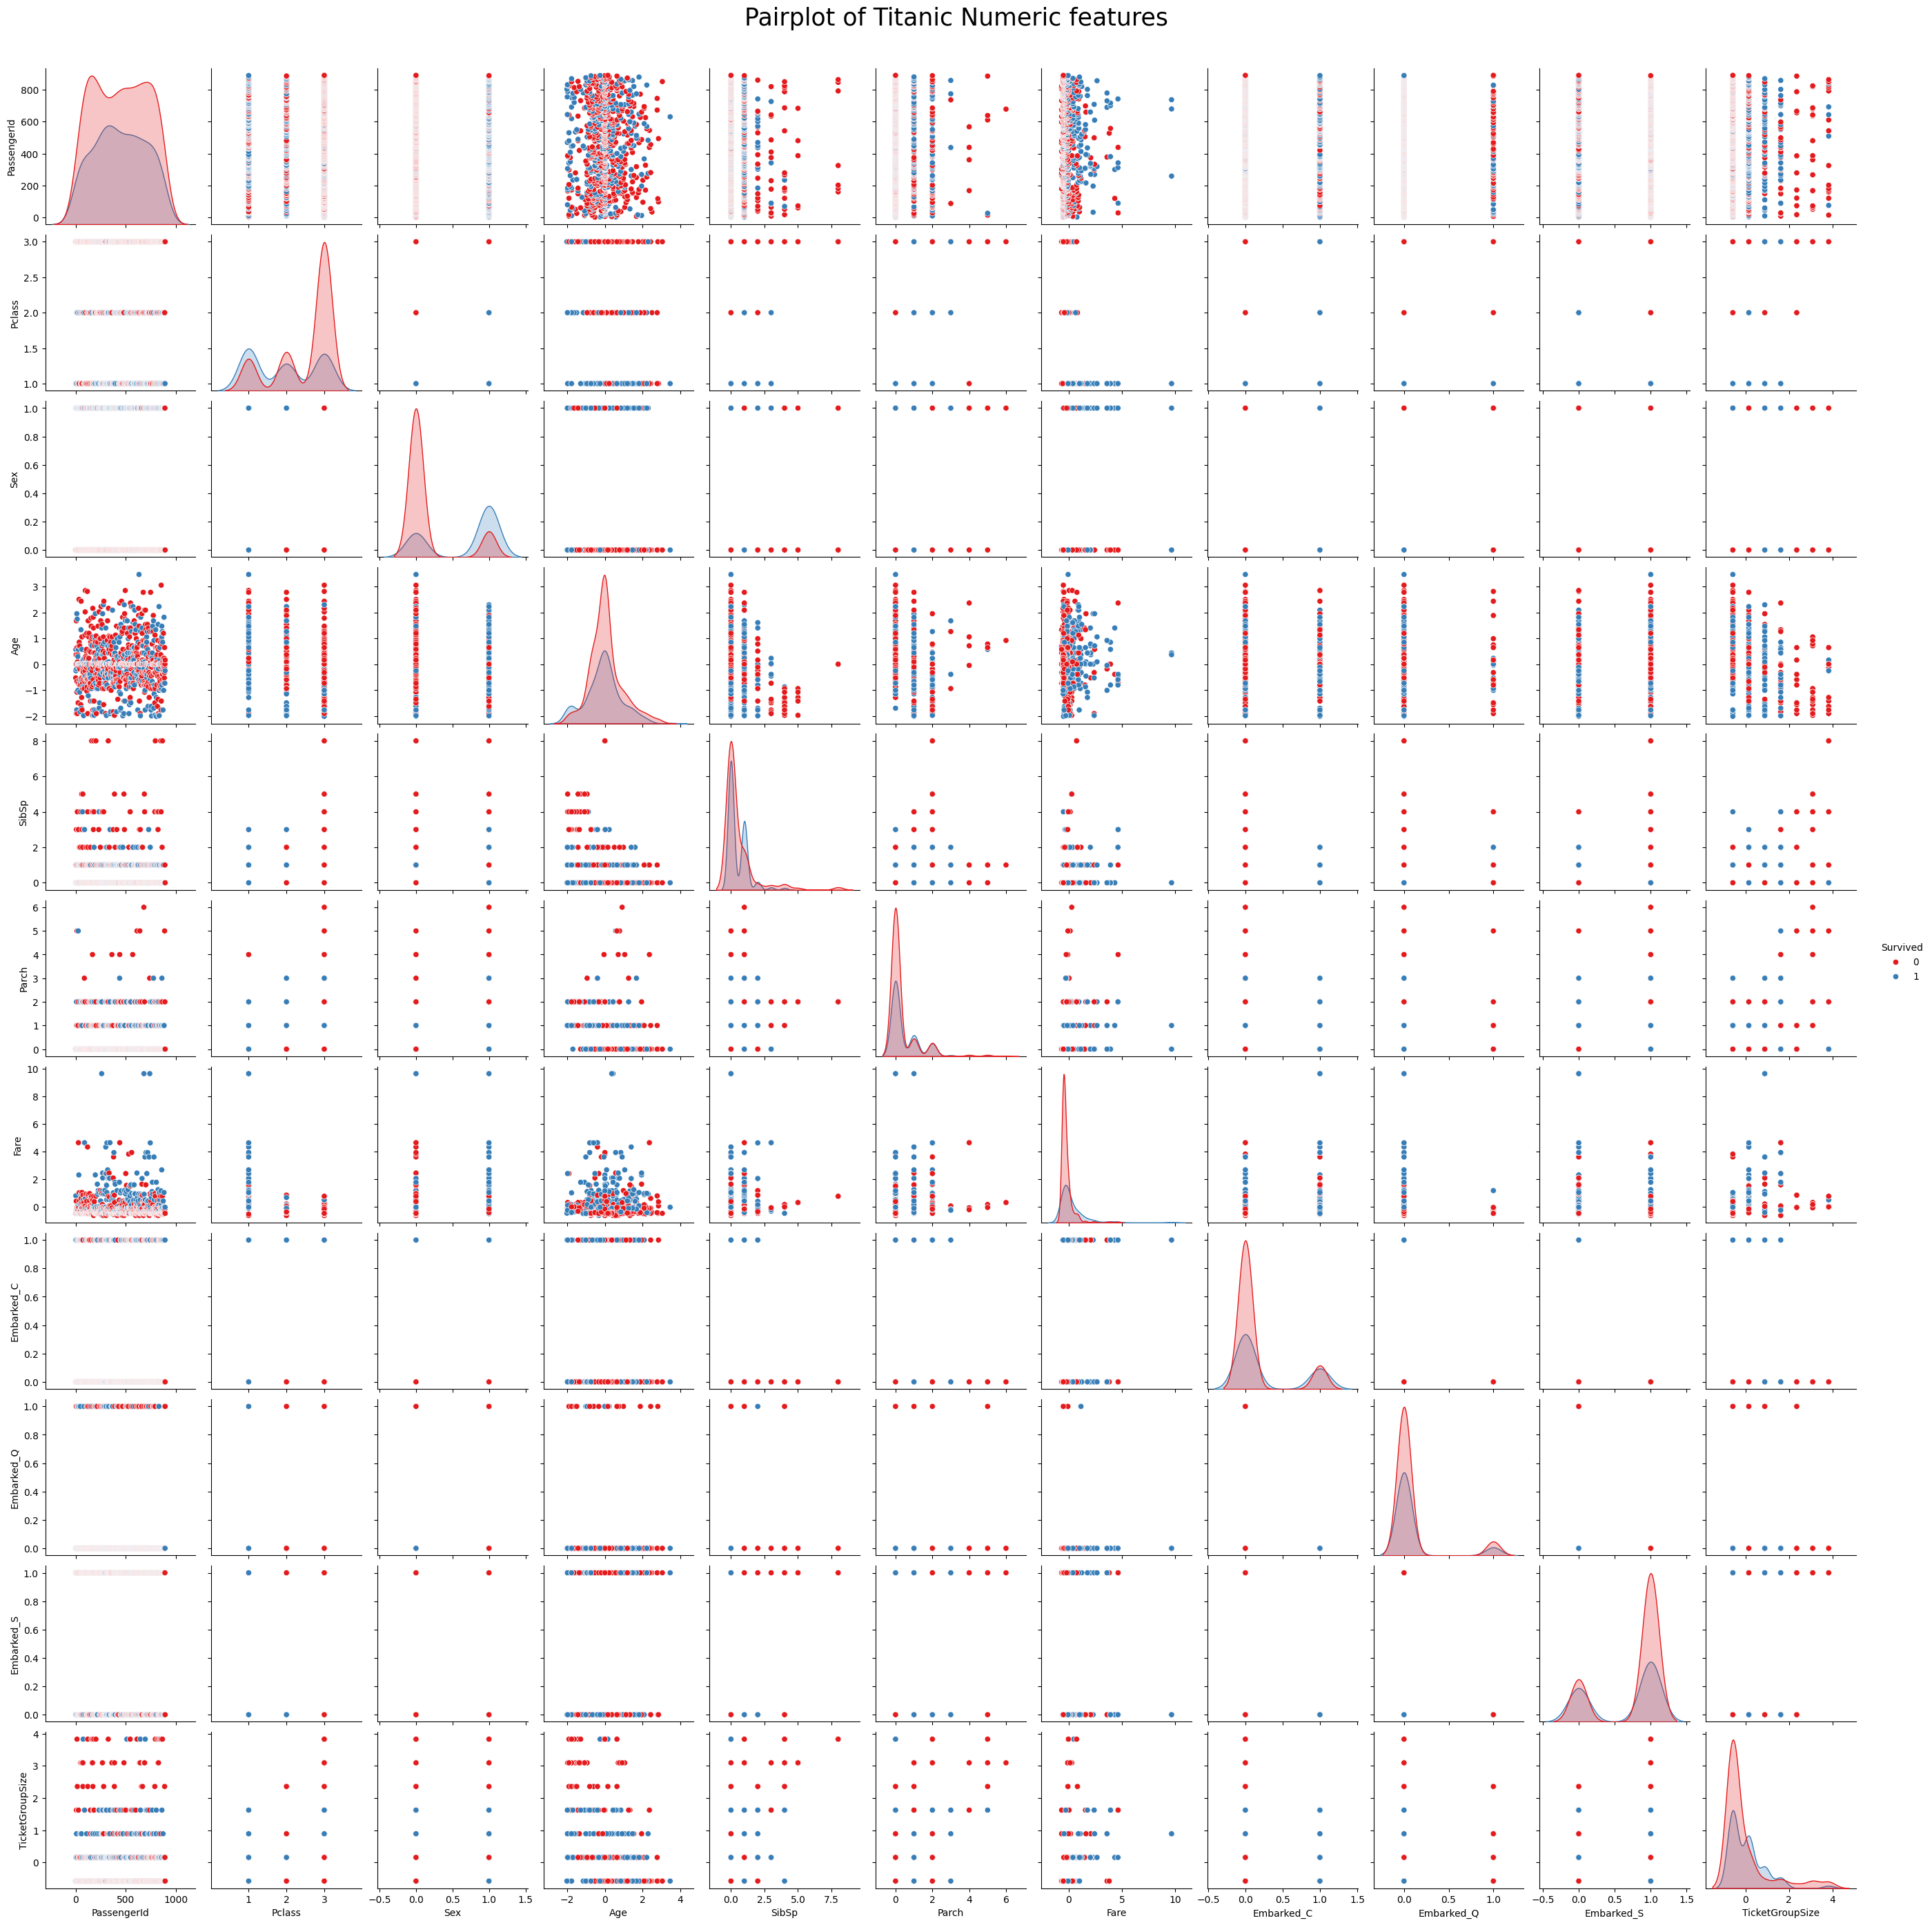

In [ ]:
sns.pairplot(data, hue = 'Survived',diag_kind = 'kde', palette = 'Set1')
plt.suptitle('Pairplot of Titanic Numeric features', y = 1.02, fontsize=25)
plt.show()

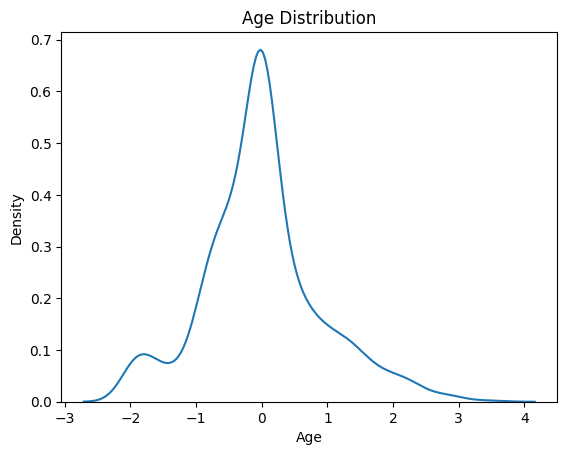

In [ ]:
sns.kdeplot(data['Age'])
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


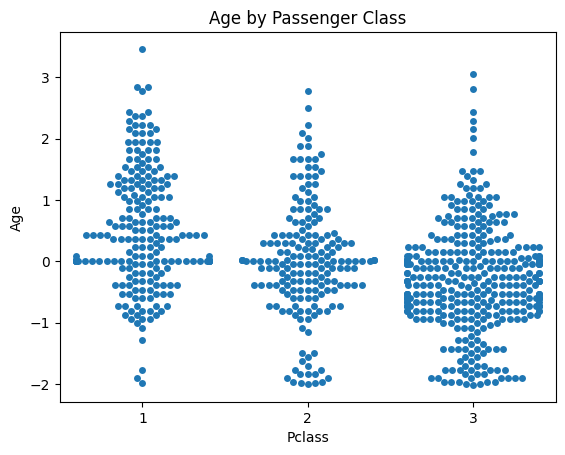

In [ ]:
sns.swarmplot(x = 'Pclass', y = 'Age', data = data)
plt.title('Age by Passenger Class')
plt.show()

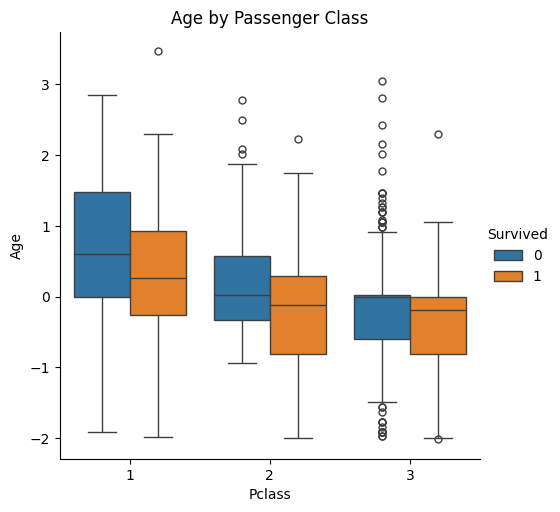

In [ ]:
sns.catplot(x = 'Pclass', y = 'Age', data = data, kind = 'box', hue = 'Survived')
plt.title('Age by Passenger Class')
plt.show()

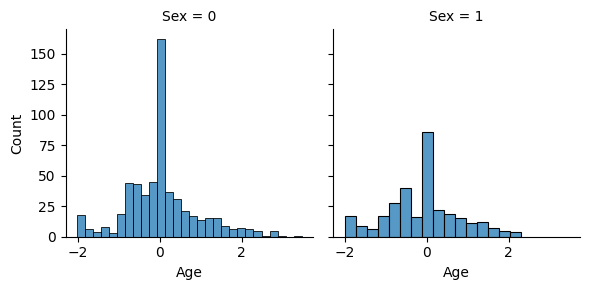

In [ ]:
g = sns.FacetGrid(data, col='Sex')
g.map(sns.histplot, 'Age')


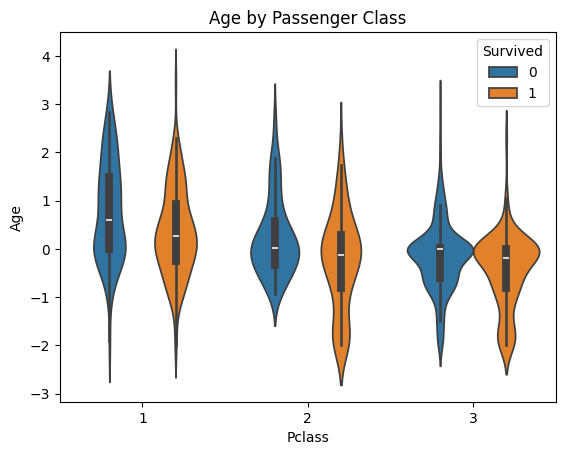

In [ ]:
sns.violinplot(x = 'Pclass', y = 'Age', data=data, hue = 'Survived')
plt.title('Age by Passenger Class')
plt.show()